In [1]:
#%matplotlib inline

import pylab

import xml.etree.ElementTree as ET
import json
import os
import pandas as pd
import re
import numpy as np
import itertools

# visualization
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns


#  machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, f1_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm

plt.style.use('seaborn-white')
pylab.ion()

In [2]:
df_arxiv=pd.read_json('./files/ARXIV.json') 
data_arxiv=df_arxiv.copy()
data_arxiv['cat2']=data_arxiv['cat2'].apply(lambda x: x.lower().replace("arxiv:", ""))

In [3]:
print 'Number of entries in ARXIV:', data_arxiv.shape[0]

Number of entries in ARXIV: 506846


In [4]:
dict_cat  = dict(data_arxiv['cat2'].value_counts())
cat_count_sorted = sorted(dict_cat.items(), key=lambda x: x[1], reverse = True)
sub_cats=dict(cat_count_sorted[:18]).keys()
# Keep only the first 18 categories
data_arxiv_sub = data_arxiv[data_arxiv['cat2'].isin(sub_cats)]

In [5]:
data_arxiv_sub.shape

(477161, 7)

# Data analysis

In [6]:
data_arxiv.head(1)

,abs1,cat0,cat1,cat2,key1,key2,title
0,The original Schrodinger's paper is translated...,arXiv,quant-ph/9903100,quant-ph,oai:arXiv.org:quant-ph/9903100,arXiv,About Heisenberg uncertainty relation


In [7]:
# Define train and test sets
data_arxiv_sub_train, data_arxiv_sub_test = train_test_split(data_arxiv_sub, test_size=0.2, random_state=42342)

In [8]:
rep_cat = {u'astro-ph.sr' :  u'astro-ph', u'astro-ph.ep' :  u'astro-ph',  u'astro-ph.co':  u'astro-ph',
           u'astro-ph.he' : u'astro-ph', u'astro-ph.im':  u'astro-ph', u'astro-ph.ga': u'astro-ph',
           u'physics.acc-ph':  u'physics.acc-ph', u'nucl-th':u'nucl-th', u'hep-ph':  u'hep-ph',
           u'nucl-ex':  u'nucl-ex', u'math-ph': u'math-ph', u'gr-qc':  u'gr-qc',
           u'hep-lat': u'hep-lat', u'physics.ins-det': u'physics.ins-det', u'hep-ex': u'hep-ex',
           u'hep-th': u'hep-th', u'quant-ph': u'quant-ph', u'astro-ph': u'astro-ph'}
y_cat_train = data_arxiv_sub_train['cat2']
y_cat_train = y_cat_train.map(rep_cat) 
y_cat_test = data_arxiv_sub_test['cat2']
y_cat_test = y_cat_test.map(rep_cat) 

In [9]:
sub_cats=[ u'physics.acc-ph', u'nucl-th', u'hep-ph', u'nucl-ex', u'math-ph',
          u'astro-ph', u'hep-lat', u'physics.ins-det', u'hep-ex', u'hep-th', u'quant-ph', u'gr-qc']

In [10]:
from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = stopwords.words('english') + list(punctuation)
 
def tokenize(text):
    words = word_tokenize(text)
    return [w.lower() for w in words]

def plot_tfidf_classfeats_h(dfs, labels):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''
    fig = plt.figure(figsize=(10, 8), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title( labels[i], fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, [v[1] for v in df], align='center', color='#3F5D7D')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels([v[0] for v in df])
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

In [11]:
#Titles
X_titles_train  = data_arxiv_sub_train['title']
X_titles_test  = data_arxiv_sub_test['title']
#Abstracts
X_abstracts_train  = data_arxiv_sub_train['abs1']
X_abstracts_test  = data_arxiv_sub_test['abs1']

In [27]:
X_titles_test.shape

(95433,)

In [12]:
# Build vocabulary titles
temp = data_arxiv_sub_train['title'].apply(tokenize).values
vocabulary_titles = set(np.concatenate(temp))
del temp

In [16]:
print "Size of vocabulary for titles:", len(vocabulary_titles), 'words.'

Size of vocabulary for titles: 87338 words.


In [22]:
# # Build vocabulary abstracts
# temp = data_arxiv_sub_train['abs1'].apply(tokenize).values
# vocabulary_abstracts = set(np.concatenate(temp))
# del temp

## Use tf-idf features in titles to fit

In [17]:
tfidf_titles = TfidfVectorizer(stop_words=stop_words, tokenizer=tokenize, vocabulary=vocabulary_titles)

In [18]:
# Fit the tf-idf model to titles
tfidf_titles.fit([text for text in data_arxiv_sub_train['title'].values])

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words=[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u"you're", u"you've", u"you'll", u"you'd", u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u"she's", u'her', u'hers', u'herself', u'it', u"it's", u'its', u'itself', u'th...'-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~'],
        strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=<function tokenize at 0x1d07bdf50>, use_idf=True,
        vocabulary=set([u'quasi-localization', u'quarkomium', u'homomorphism', u'ultralarge-scale', u'q-1', u'z/gamma*', u'theta**-2', u'mass

In [19]:
X_titles_train_tfidf = tfidf_titles.transform(X_titles_train.values)
X_titles_test_tfidf = tfidf_titles.transform(X_titles_test.values)

In [20]:
model_LSVC = LinearSVC()
model_NB = MultinomialNB() 
model_RF = RandomForestClassifier(max_depth=2, random_state=0)

In [21]:
model_LSVC.fit(X_titles_train_tfidf,y_cat_train.values)
model_NB.fit(X_titles_train_tfidf,y_cat_train.values)
model_RF.fit(X_titles_train_tfidf,y_cat_train.values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [22]:
result_LSVC = model_LSVC.predict(X_titles_test_tfidf)
result_LSVC_train = model_LSVC.predict(X_titles_train_tfidf)
result_NB = model_NB.predict(X_titles_test_tfidf)
result_NB_train = model_NB.predict(X_titles_train_tfidf)
result_RF = model_RF.predict(X_titles_test_tfidf)
result_RF_train = model_RF.predict(X_titles_train_tfidf)

In [23]:
print  "Linear SVC accuracy: ", accuracy_score(y_cat_test.values,  result_LSVC)
print  "Multinomial Naive Bayes accuracy: ", accuracy_score(y_cat_test.values, result_NB)
print  "Random Forest accuracy: ", accuracy_score(y_cat_test.values, result_RF)

Linear SVC accuracy:  0.81996793562
Multinomial Naive Bayes accuracy:  0.747131495395
Random Forest accuracy:  0.364035501346


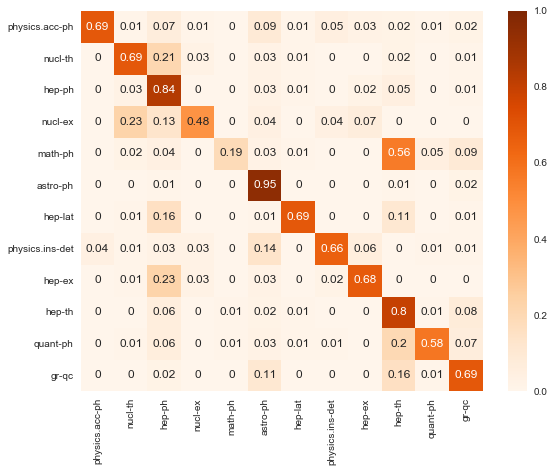

In [24]:
cm_LSVC = confusion_matrix(y_cat_test.values,  result_LSVC, labels = sub_cats)
cm_LSVC_norm = np.round(100.0*cm_LSVC/(cm_LSVC.sum(axis=1)).reshape((len(sub_cats),1)))/100
df_cm_LSVC = pd.DataFrame(cm_LSVC_norm, index = [_ for _ in sub_cats],
                  columns = [_ for _ in sub_cats])
plt.figure(figsize = (9,7))
heat_plot=sns.heatmap(df_cm_LSVC, annot=True, vmin=0, vmax=1,cmap='Oranges')
#heat_plot.set_yticklabels(sub_cats,rotation=0, fontsize=13)
#heat_plot.set_xticklabels(list(reversed(sub_cats)),rotation=90, fontsize=13)
plt.show()

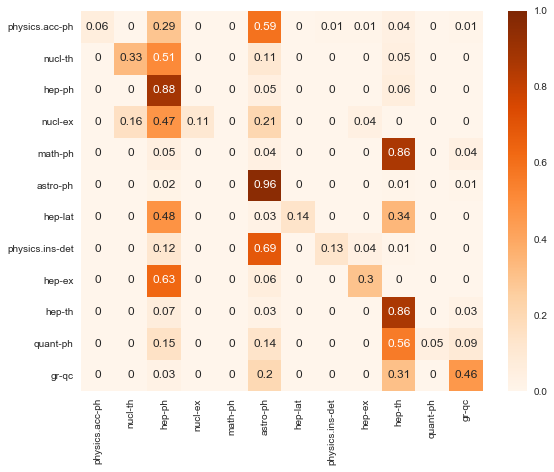

In [25]:
cm_NB = confusion_matrix(y_cat_test.values,  result_NB, labels = sub_cats)
cm_NB_norm = np.round(100.0*cm_NB/(cm_NB.sum(axis=1)).reshape((len(sub_cats),1)))/100
df_cm_NB = pd.DataFrame(cm_NB_norm, index = [_ for _ in sub_cats],
                  columns = [_ for _ in sub_cats])
plt.figure(figsize = (9,7))
heat_plot=sns.heatmap(df_cm_NB, annot=True, vmin=0, vmax=1,cmap='Oranges')
#heat_plot.set_yticklabels(sub_cats,rotation=0, fontsize=13)
#heat_plot.set_xticklabels(list(reversed(sub_cats)),rotation=90, fontsize=13)
plt.show()

# Abstracts

Use vocabolary of words from titles and apply it to abstracts.

In [25]:
tfidf_titles = TfidfVectorizer(stop_words=stop_words, tokenizer=tokenize, vocabulary=vocabulary_titles)

In [26]:
# Fit the tf-idf model to titles
tfidf_titles.fit([text for text in data_arxiv_sub_train['abs1'].values])

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words=[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u"you're", u"you've", u"you'll", u"you'd", u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u"she's", u'her', u'hers', u'herself', u'it', u"it's", u'its', u'itself', u'th...'-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~'],
        strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=<function tokenize at 0x1ce1abf50>, use_idf=True,
        vocabulary=set([u'quasi-localization', u'quarkomium', u'homomorphism', u'ultralarge-scale', u'q-1', u'z/gamma*', u'theta**-2', u'mass

In [27]:
X_abstracts_train_tfidf = tfidf_titles.transform(X_abstracts_train.values)
X_abstracts_test_tfidf = tfidf_titles.transform(X_abstracts_test.values)

In [28]:
model_LSVC =LinearSVC()
model_NB = MultinomialNB() 
model_RF = RandomForestClassifier(max_depth=2, random_state=0)

In [29]:
model_LSVC.fit(X_abstracts_train_tfidf,y_cat_train.values)
model_NB.fit(X_abstracts_train_tfidf,y_cat_train.values)
model_RF.fit(X_abstracts_train_tfidf,y_cat_train.values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [30]:
result_LSVC = model_LSVC.predict(X_abstracts_test_tfidf)
result_NB = model_NB.predict(X_abstracts_test_tfidf)
result_RF = model_RF.predict(X_abstracts_test_tfidf)

In [31]:
print  "Linear SVC accuracy: ", accuracy_score(y_cat_test.values,  result_LSVC)
print  "Naive Bayes accuracy: ", accuracy_score(y_cat_test.values, result_NB)
print  "Random Forest accuracy: ", accuracy_score(y_cat_test.values, result_RF)

Linear SVC accuracy:  0.86553917408
Naive Bayes accuracy:  0.785545880356
Random Forest accuracy:  0.369211907831


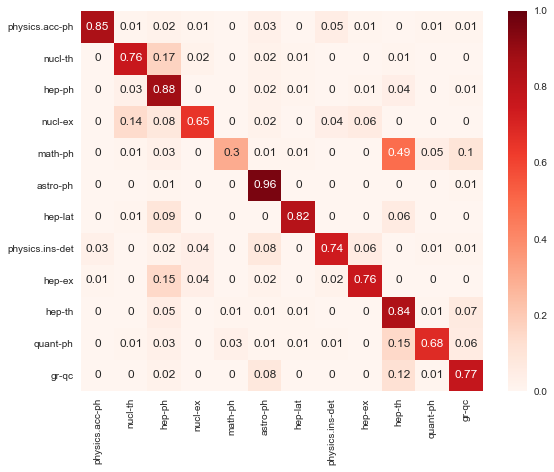

In [40]:
cm_LSVC = confusion_matrix(y_cat_test.values,  result_LSVC, labels = sub_cats)
cm_LSVC_norm = np.round(100.0*cm_LSVC/(cm_LSVC.sum(axis=1)).reshape((len(sub_cats),1)))/100
df_cm_LSVC = pd.DataFrame(cm_LSVC_norm, index = [_ for _ in sub_cats],
                  columns = [_ for _ in sub_cats])
plt.figure(figsize = (9,7))
heat_plot=sns.heatmap(df_cm_LSVC, annot=True, vmin=0, vmax=1,cmap='Reds')
#heat_plot.set_yticklabels(sub_cats,rotation=0, fontsize=13)
#heat_plot.set_xticklabels(list(reversed(sub_cats)),rotation=90, fontsize=13)
plt.show()